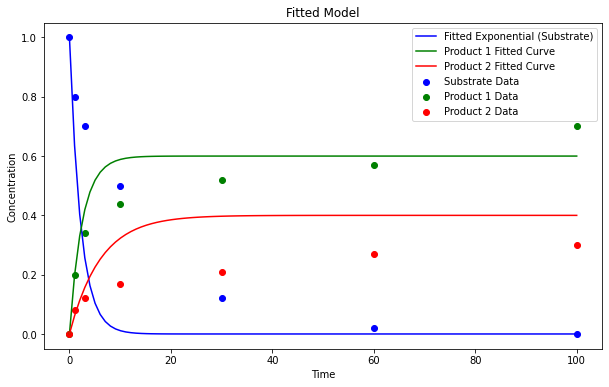

Optimal parameters:
k_depletion: -0.44856666974471676
k_formation1: 0.3957117204092614
k_formation2: 0.164285156610709
fraction: 0.6


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Given data (time and substrate concentration)
time_data = np.array([0, 1, 3, 10, 30, 60, 100])  # Time points
substrate_data = np.array([1, 0.8, 0.7, 0.5, 0.12, 0.02, 0])  # Substrate concentration over time
product_data1 = np.array([0, 0.20, 0.34, 0.44, 0.52, 0.57, 0.7])  # Concentration of product 1 over time
product_data2 = np.array([0, 0.08, 0.12, 0.17, 0.21, 0.27, 0.3])  # Concentration of product 2 over time

# Define exponential decay function for substrate
def initial_dna_depletion(t, k_depletion):
    return np.exp(-k_depletion * t)

# Define exponential growth function for products with different final amounts
def product_formation_system(t, k_formation1, k_formation2, fraction):
    C1 = fraction
    C2 = 1 - C1
    formation_product1 = C1 * (1 - np.exp(-k_formation1 * t))
    formation_product2 = C2 * (1 - np.exp(-k_formation2 * t))
    return formation_product1, formation_product2

# Define the product formation model function with separate k and C parameters for each product
def ode_system(t, y, k_depletion, k_formation1, k_formation2):
    S, P1, P2 = y
    dSdt = -k_depletion * S
    dP1dt = k_formation1 * S * (1 - P2)
    dP2dt = k_formation2 * S * (1- P1)
    return [dSdt, dP1dt, dP2dt]

# Define the objective function for least squares minimization
def objective_function(params):
    k_depletion, k_formation1, k_formation2, fraction = params
    y_predicted = ode_system(time_data, [substrate_data[0], 0, 0], k_depletion, k_formation1, k_formation2)
    residuals_substrate = y_predicted[0] - substrate_data
    residuals_product1 = y_predicted[1] - product_data1
    residuals_product2 = y_predicted[2] - product_data2
    return np.concatenate((residuals_substrate, residuals_product1, residuals_product2))

# Initial guess for parameters
initial_guess = [0.1, 0.1, 0.1, 0.6]  # Example initial guess for the parameters

# Fit the objective function to the data using least squares
result = least_squares(objective_function, initial_guess)

# Extract the optimal parameters
k_depletion_opt, k_formation1_opt, k_formation2_opt, fraction_opt = result.x

# Generate points for the fitted curves for substrate and products
substrate_fit = initial_dna_depletion(time_data, k_depletion_opt)
product1_fit, product2_fit = product_formation_system(time_data, k_formation1_opt, k_formation2_opt, fraction_opt)  # Assuming equal fractions for product 1 and 2

x_values = np.linspace(0, 100, 100)

# Generate points for the fitted curves for substrate and products
substrate_fit = initial_dna_depletion(x_values, -k_depletion_opt)
product1_fit, product2_fit = product_formation_system(x_values, k_formation1_opt, k_formation2_opt, fraction_opt)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot the original data
plt.scatter(time_data, substrate_data, label='Substrate Data', color='blue')
plt.scatter(time_data, product_data1, label='Product 1 Data', color='green')
plt.scatter(time_data, product_data2, label='Product 2 Data', color='red')

# Plot the fitted curves
plt.plot(x_values, substrate_fit, 'b-', label='Fitted Exponential (Substrate)')
plt.plot(x_values, product1_fit, 'g-', label='Product 1 Fitted Curve')
plt.plot(x_values, product2_fit, 'r-', label='Product 2 Fitted Curve')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Fitted Model')
plt.legend()
plt.show()

# Print optimal parameters
print("Optimal parameters:")
print("k_depletion:", k_depletion_opt)
print("k_formation1:", k_formation1_opt)
print("k_formation2:", k_formation2_opt)
print("fraction:", fraction_opt)